In [122]:
words = ['hey', 'there']

# sliding window, get parts of a word by tuples of 2 chars each
for name in words:
    for ch1, ch2 in zip(name, name[1:]):
        print(f'{ch1},{ch2}')

# w = words[0]
# wrds = zip(w,w[1:]) # pairs start of word with word missing first character and moves the pair to the end
# # list(wrds)

sorted(list(set(''.join(words)))) # gets all the unique letters from the set of words (set eliminates duplicate letters from the joined string to get the unique ones in the whole dataset)

h,e
e,y
t,h
h,e
e,r
r,e


['e', 'h', 'r', 't', 'y']

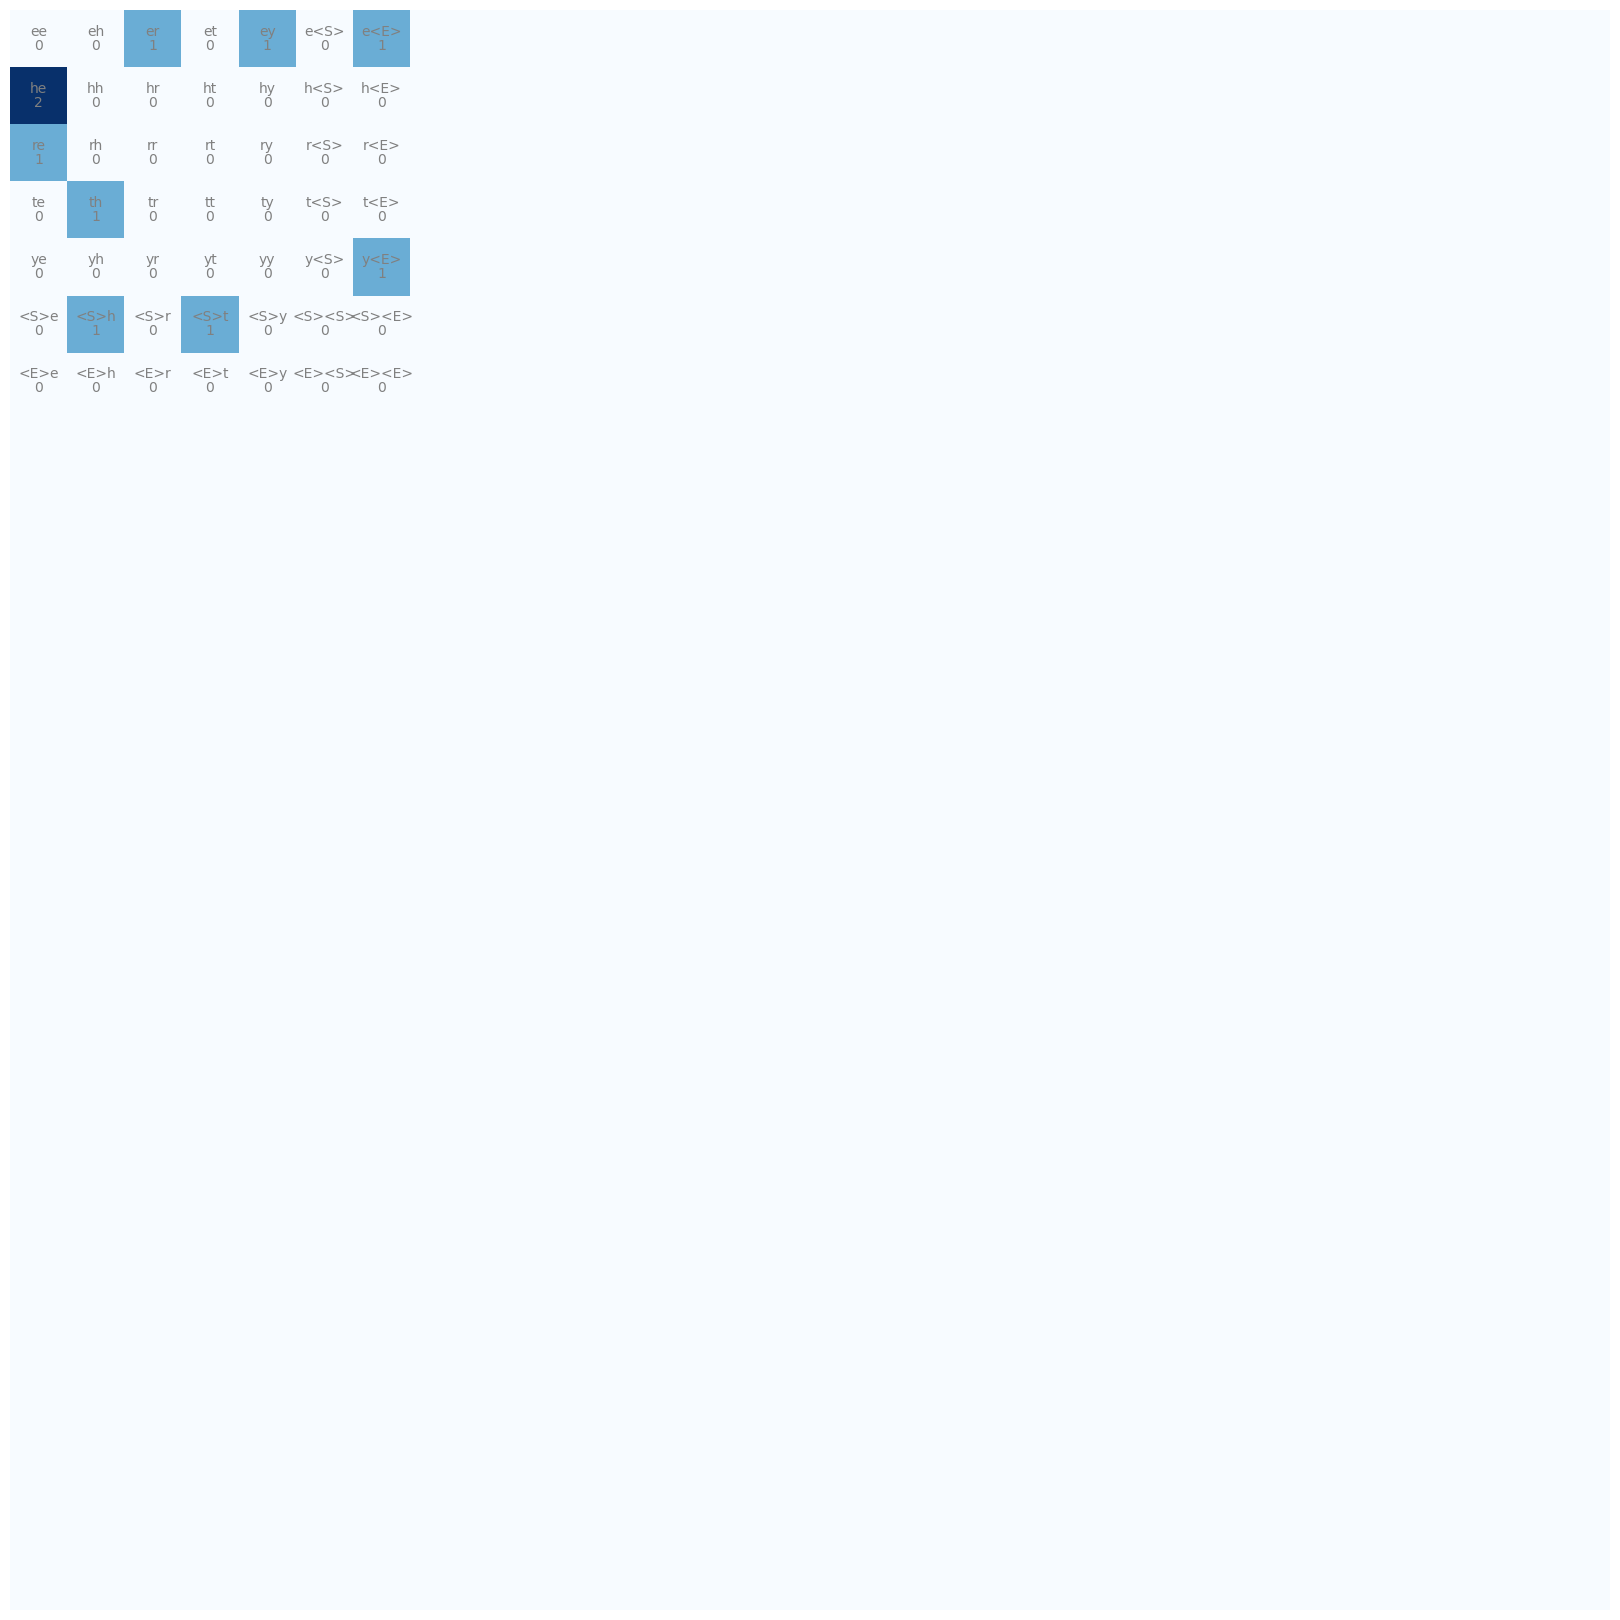

In [123]:
import torch
import matplotlib.pyplot as plt

dims = 28

# make a tensor (multi-d array) to hold coordinates/counts of word character pairs
N = torch.zeros((dims,dims), dtype=torch.int32) # 26 letters in alphabet, plus 2 entries for special word start and end signifiers (<S> or <E>)

START_CH = '<S>'
END_CH = '<E>'

chars = sorted(list(set(''.join(words))))
# make a numerical mapping dictionary of the letters to a number (use the index number)
stoi = {s:i for i, s in enumerate(chars)}
# print(stoi) # { 'e': 0, 'h': 1, etc... }
# add entries for special signifiers for word start and end:
stoi[START_CH] = len(stoi) # insert last index (existing zero based plus 1 is what is returned from len)
stoi[END_CH] = len(stoi)
# print(stoi)

for name in words:
    chs = [START_CH] + list(name) + [END_CH] # add special signifiers for word start and end to mark special letters as such
    # put the counts of the character pair coordinates in the tensor created
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # numerical mapping to char from the dictionary - its index in this case
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


# plot the resulting counts

# reverse the string to integer dictionary to make it a integer to string dictionary:
itos = {i:s for s, i in stoi.items()} # .items() gives is key value pairs instead of index value pairs like enumerate()

# plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(N, cmap='Blues', aspect='auto') # plot a visualization of the frequency of char pairs on a plot

for i in range(len(itos)):
    for j in range(len(itos)): # loop over all possible combinations of 2 chars
        chstr = itos[i] + itos[j] # pair of chars extracted from the dict, ex: ee or eh etc.
        # print(chstr)
        # in each coordinate cell print the text of the char pair and the count
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray') # j is column -> x-coord, i is the row -> y-coord
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray') # need to use .item() to extract the value from the pytorch tensor

ax.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Note how the last two rows are all zeros because it is not possible to have instances where the end character preceeds a letter
  # same with the start character before ending letters in the dataset - these are inefficiencies from this output

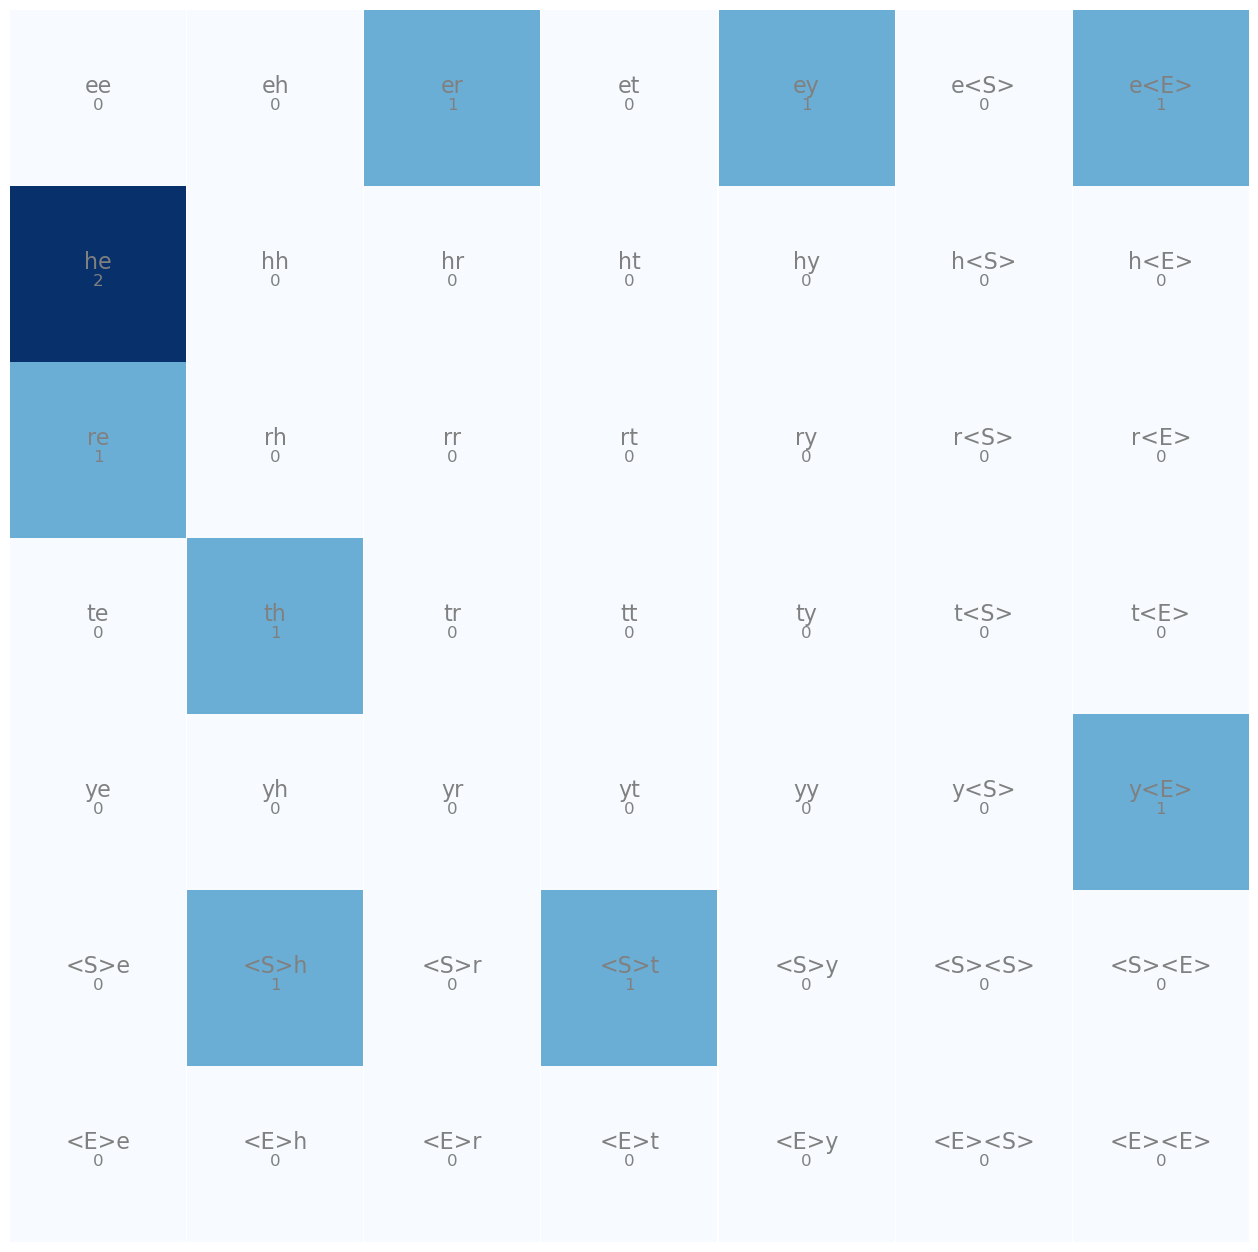

In [124]:
#### Same plot, just larger and easier to see using Grid etc.

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np  # Assuming N is a numpy array or similar

itos = {i:s for s, i in stoi.items()}

# Create figure
fig = plt.figure(figsize=(16, 16))

# Use GridSpec to create a grid that matches our data
gs = GridSpec(len(itos), len(itos), figure=fig)

for i in range(len(itos)):
    for j in range(len(itos)):
        # Create a sub axis for each cell
        ax = fig.add_subplot(gs[i, j])
        
        # Draw rectangle for color
        rect = plt.Rectangle((0, 0), 1, 1, color=plt.cm.Blues(N[i, j].item() / N.max()), fill=True)
        ax.add_patch(rect)
        
        # Add text for character pair
        ax.text(0.5, 0.5, itos[i] + itos[j], ha='center', va='bottom', color='gray', fontsize=16)
        
        # Add text for count
        ax.text(0.5, 0.5, str(N[i, j].item()), ha='center', va='top', color='gray', fontsize=12)
        
        # Turn off axis for each cell
        ax.axis('off')
        
        # Ensure each cell is square
        ax.set_aspect('equal')

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

{'e': 1, 'h': 2, 'r': 3, 't': 4, 'y': 5, '.': 0}


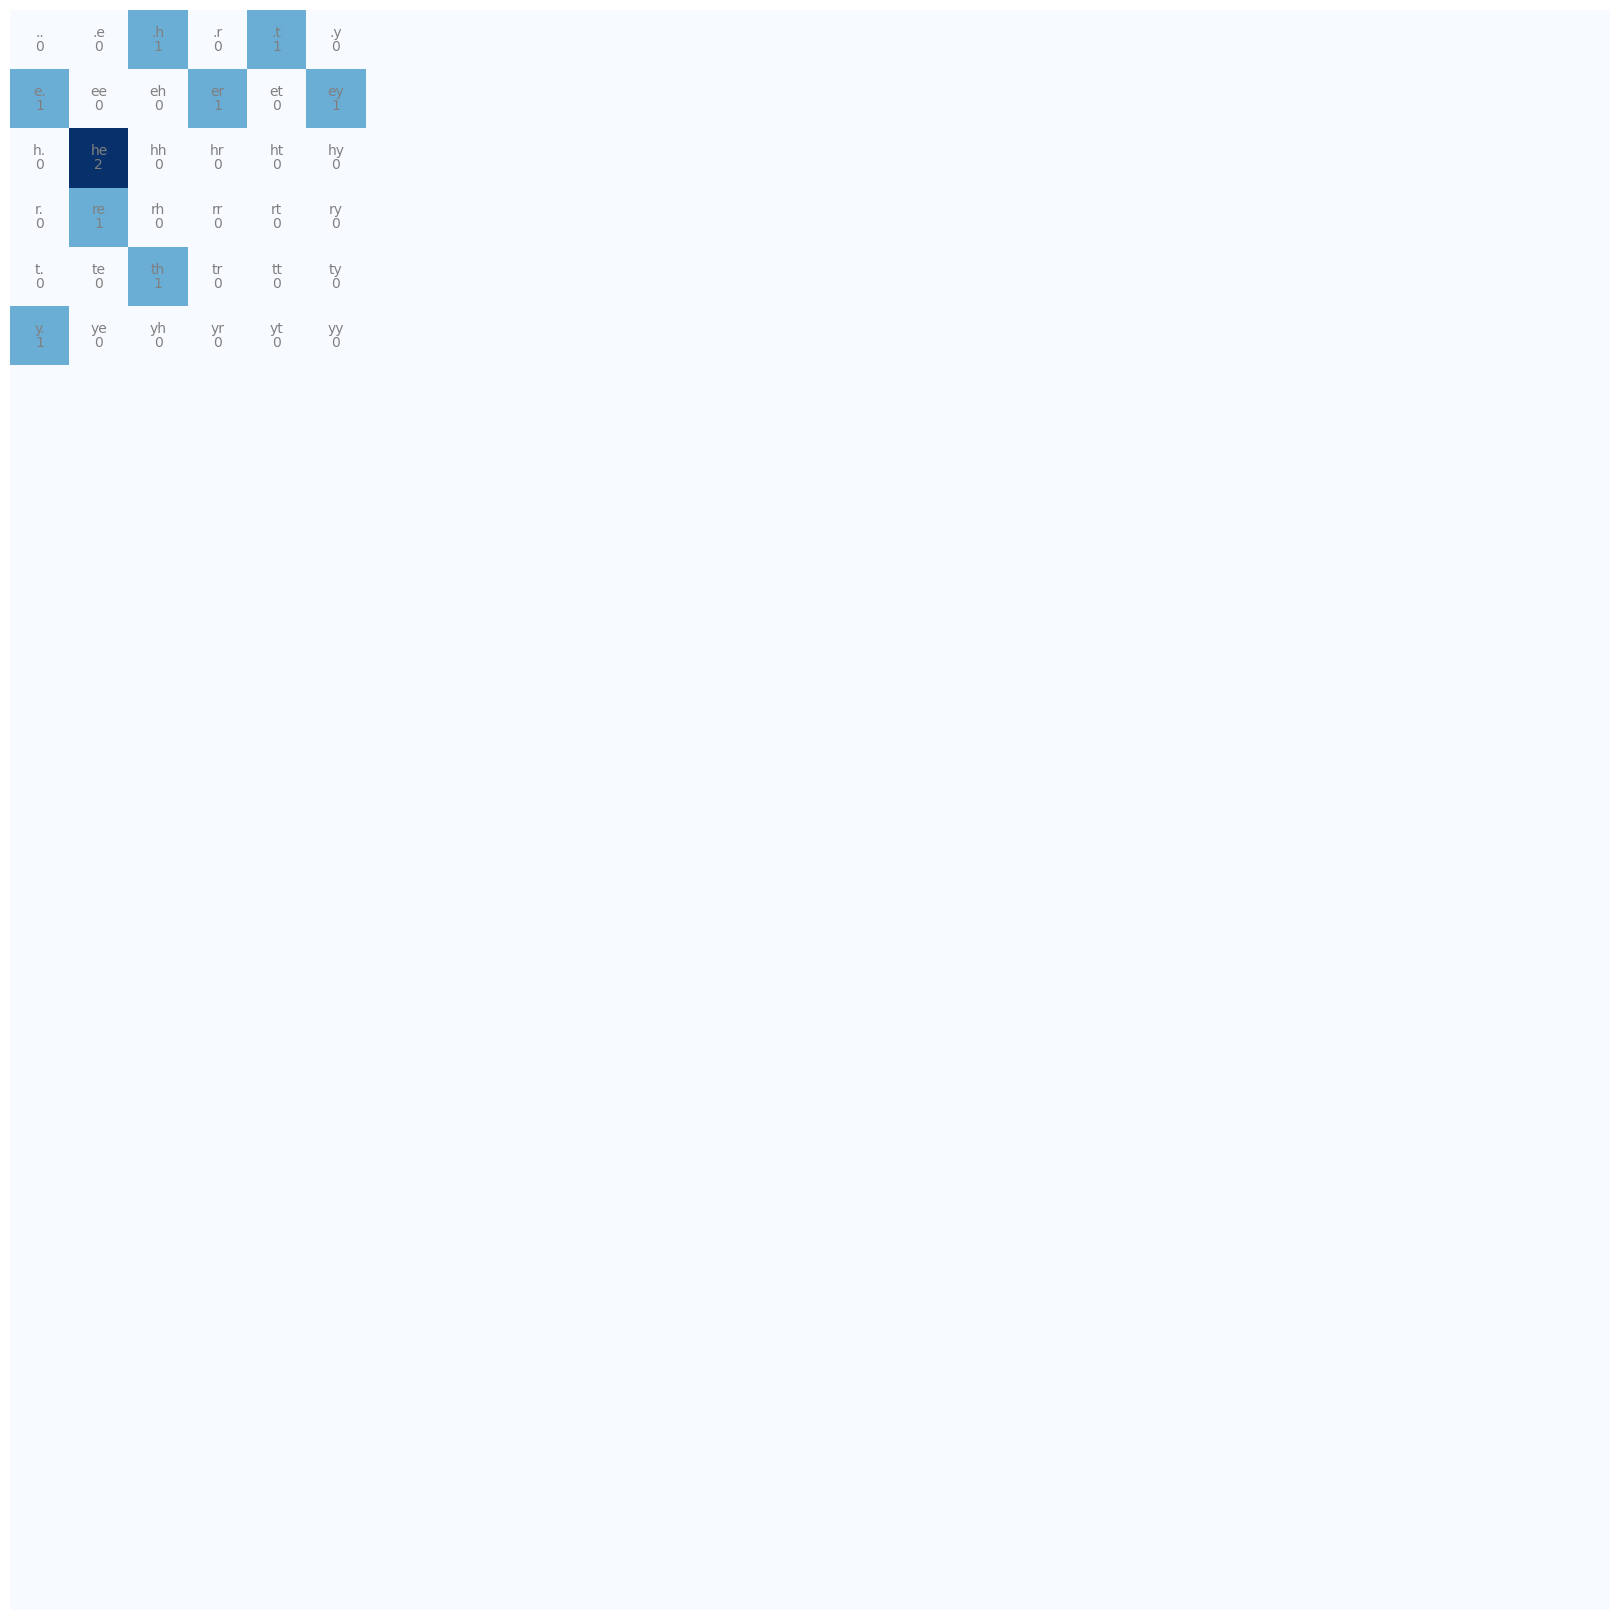

In [125]:
######### ITERATION ON IMPROVING THE OUTPUT AND ANALYSIS OF THE DATASET

import torch
import matplotlib.pyplot as plt

dims = 27 # only one special token (all alpha chars + 1 instead of 2 originally for wrd start and end)

# make a tensor (multi-d array) to hold coordinates/counts of word character pairs
N = torch.zeros((dims,dims), dtype=torch.int32)

SPECIAL_CH = '.' # the one special token is a dot

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i, s in enumerate(chars)} # shift over chars to start at 1 and allow special token to have a mapping of 0
stoi[SPECIAL_CH] = 0 # insert special token at the beginning for convenience
print(stoi)
# reverse the string to integer dictionary to make it a integer to string dictionary:
itos = {i:s for s, i in stoi.items()} # .items() gives is key value pairs instead of index value pairs like enumerate()


for name in words:
    chs = [SPECIAL_CH] + list(name) + [SPECIAL_CH] # add special tokens for word start and end to mark special letters as such
    # put the counts of the character pair coordinates in the tensor created
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # numerical mapping to char from the dictionary - its index in this case
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


# plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(N, cmap='Blues', aspect='auto') # plot a visualization of the frequency of char pairs on a plot

for i in range(len(itos)):
    for j in range(len(itos)): # loop over all possible combinations of 2 chars
        chstr = itos[i] + itos[j] # pair of chars extracted from the dict, ex: ee or eh etc.
        # print(chstr)
        # in each coordinate cell print the text of the char pair and the count
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray') # j is column -> x-coord, i is the row -> y-coord
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray') # need to use .item() to extract the value from the pytorch tensor

ax.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Now the data is organized and optimized better - the last rows of all 0 counts are removed, and the start and ending characters are all along the first row or col of the axes
  # there is also a .. combination with a count of zero in the first plotted coord - we do not have empty words

In [126]:
#### Working with the optimized and cleaned up dataset

# all of the counts in the first row represent starting letters
all_starting_letter_counts = N[0]
# print(all_starting_letter_counts)

### convert the counts to probabilities ###

# Get the probability of any of these characters from the first row being the first letter of a word:

# convert to float to normalize the counts for creating a probability distribution
p = all_starting_letter_counts.float()
# create a distribution by dividing the count of a particular charpair by the sum (the chance that char count has out of total counts)
p = p / p.sum()
# note: now the sum of all p sums to 1.0 (conforming with a probability distribution max)
# print(p)


##### TORCH.MULTINOMIAL ######

# Use torch.multinomial to get a sampling of the distribution (picking outcomes based on their probability)
  # returns samples from the multinomial probability distribution given - returns integers that represent the index of the values of the distribution passed in

# use a generator object in pytorch to make everything deterministic (get same results given same input on different machines)
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g) # create 3 random numbers based on the deterministic seed
print(f'event counts: {p}') # running many times will always generate the same random 3 numbers between 0 and 1
# these numbers can be thought of representing counts of unique events occuring

p = p / p.sum()
# the probabilities are shown, i.e. the probability for the first value is 60%
print(f'probability distribution of event counts: {p}')

# Using torch.multinomial with a distribution - pass in the distribution, how many samples to pull from the distribution, replacement and the generator
torch.multinomial(p, num_samples=100, replacement=True, generator=g) # need to add replacement=True to put the item drawn back into the set for next drawing (it is False by default)
# the numbers represent the index of the outcomes in the distribution passed in. For example, 2 should show up very infrequently compared to others since it has a probability of .0903 (9%)
# the more you increase the samples, the more the outputs will match more closely the distribution passed in (law of large numbers)

event counts: tensor([0.7081, 0.3542, 0.1054])
probability distribution of event counts: tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [127]:
# Getting a sample from the words dataset with torch.multinomial

all_starting_letter_counts = N[0]
# convert to float to normalize the counts for creating a probability distribution
p = all_starting_letter_counts.float()
# create a distribution by dividing the count of a particular charpair by the sum (the chance that char count has out of total counts)
p = p / p.sum()
# print(p)

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
print(f'A sample (index of starting letter in dict) from starting letters: {ix.item()}')
print(f'Character: {itos[ix.item()]}')
# look at the top row of the plot made of the chars which represents starting letters of the words to see if the drawn letter has higher probability(count compared to the others)

A sample (index of starting letter in dict) from starting letters: 4
Character: t


In [128]:
# Now we can look at the row in the plot of the sampled letter which contains further two letter combinations starting with it

g = torch.Generator().manual_seed(2147483647)
print(itos)
ix = 0 # start at index 0

out = []
while True:
    # get the row of the index we're on, convert to float to ready to normalize for probability dist
    p = N[ix].float() # row of chars (counts) [0,2,5,22,1,...]
    # normalize the values (sum to 1) and get the probability
    p = p / p.sum()
    # draw a single sample from the distribution - this tells us what index will be next in the loop
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
    # we need to call item() to extract the value from the tenstor typed object returned from multinomial
    ix = ix.item()
    print(f'Sampled char: {itos[ix]}')
    out.append(itos[ix])

    is_end_token = ix == 0 # the second time we come across the special token `.` we know that is the end of the word and we're done
    if is_end_token:
        # the end token means to break
        break

print('Generated word: ' + ''.join(out))

{1: 'e', 2: 'h', 3: 'r', 4: 't', 5: 'y', 0: '.'}
Sampled char: t
Sampled char: h
Sampled char: e
Sampled char: r
Sampled char: e
Sampled char: y
Sampled char: .
Generated word: therey.


['emma', 'liam', 'olivia', 'noah', 'ava', 'ethan', 'sophia', 'mason', 'isabella', 'william', 'mia', 'james', 'charlotte', 'benjamin', 'amelia', 'lucas', 'harper', 'henry', 'evelyn', 'alexander', 'abigail', 'michael', 'emily', 'daniel', 'elizabeth', 'jacob', 'mila', 'logan', 'ella', 'jackson', 'avery', 'sebastian', 'sofia', 'jack', 'camila', 'aiden', 'aria', 'owen', 'scarlett', 'samuel', 'victoria', 'matthew', 'madison', 'joseph', 'luna', 'levi', 'grace', 'mateo', 'chloe', 'david', 'penelope', 'john', 'layla', 'wyatt', 'riley', 'oliver', 'zoey', 'jayden', 'nora', 'dylan', 'lily', 'luke', 'eleanor', 'gabriel', 'hannah', 'anthony', 'lillian', 'isaac', 'addison', 'grayson', 'aubrey', 'julian', 'ellie', 'christopher', 'stella', 'joshua', 'natalie', 'andrew', 'zoe', 'lincoln', 'leah', 'ryan', 'hazel', 'nathan', 'violet', 'adam', 'aurora', 'leo', 'savannah', 'jaxon', 'audrey', 'isaiah', 'brooklyn', 'eli', 'bella', 'aaron', 'claire', 'carson', 'skylar', 'charles', 'lucy', 'thomas', 'paisley', 

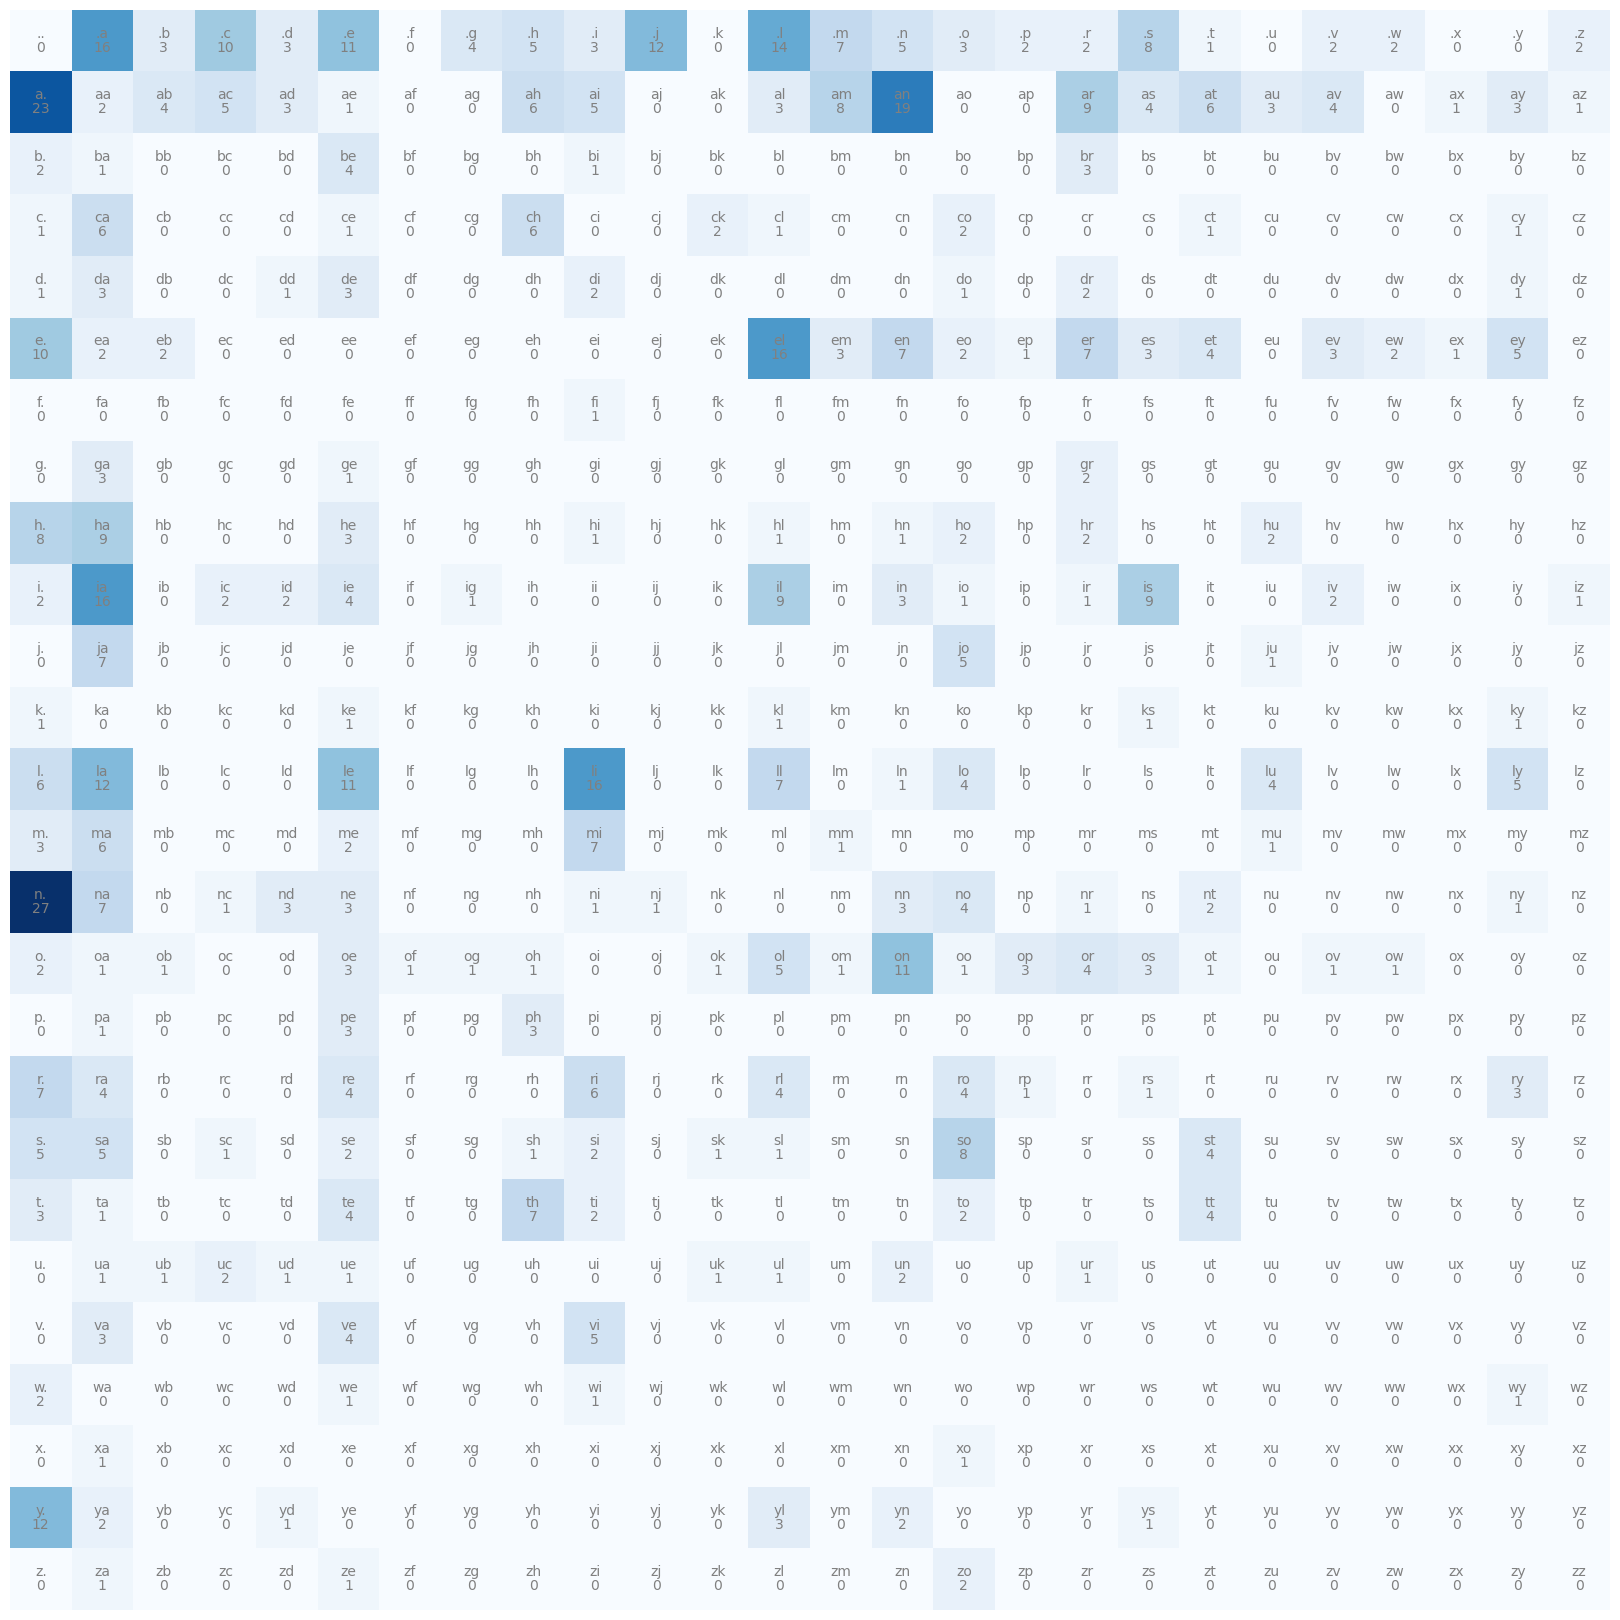

Sampled char: j
Sampled char: a
Sampled char: n
Sampled char: j
Sampled char: o
Sampled char: n
Sampled char: .
Generated name: janjon.


In [129]:
### Using a larger dataset

# Larger dataset
with open('names.txt', 'r') as file:
    names = file.readlines()

names = [name.strip().lower() for name in names] # only lowercase letters to get 26 chars
print(names)

chars = sorted(list(set(''.join(names))))

num_special_tokens = 1
dims = len(chars) + num_special_tokens

N = torch.zeros((dims,dims), dtype=torch.int32)

SPECIAL_CH = '.' # the one special token is a dot representing both start and end of a word

stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[SPECIAL_CH] = 0
itos = {i:s for s, i in stoi.items()}


for name in names:
    chs = [SPECIAL_CH] + list(name) + [SPECIAL_CH]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # numerical mapping to char from the dictionary - its index in this case
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(N, cmap='Blues', aspect='auto')

for i in range(len(itos)):
    for j in range(len(itos)): 
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray') 
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

ax.axis('off')
plt.tight_layout(pad=0)

plt.show()

g = torch.Generator().manual_seed(2147483647)


out = []
ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum() # represents a TRAINED set - results will be better than the uniform distribution below:
    # p = torch.ones(dims) / dims # Uniform distribution - all equally likely - represents an UNTRAINED set - will generate a nonsense name

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
    
    ix = ix.item()
    print(f'Sampled char: {itos[ix]}')
    out.append(itos[ix])

    is_end_token = ix == 0
    if is_end_token:
        break

print('Generated name: ' + ''.join(out))



In [130]:
# Sample multiple name generations:

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum() # represents a TRAINED set - results will be better than the uniform distribution below:
        # p = torch.ones(dims) / dims # Uniform distribution - all equally likely - represents an UNTRAINED set - will generate a nonsense name

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
        
        ix = ix.item()
        out.append(itos[ix])

        is_end_token = ix == 0
        if is_end_token:
            break
    print('Generated name: ' + ''.join(out))


Generated name: janarah.
Generated name: pharazoe.
Generated name: n.
Generated name: a.
Generated name: jostinoliaviauer.
Generated name: vilanaavian.
Generated name: lewiackse.
Generated name: ailexamuletton.
Generated name: elila.
Generated name: seliasavestia.


In [131]:
###### Manipulating Tensor for Efficiency ######

# Create a prepared dataset (matrix) that is the probabilities to improve efficiency in the loop
P = N.float() # converts all values to float as we used to do for each in the loop

# Get the sums per row to get probability of characters by row sum
# pytorch sum allows you to keep the dimensions instead of just giving you a 1-dim list of results

# Here, we sum each column by setting the first argument to dimension 1 (the row axis)
# internally this becomes a 1,26 vector (a row vector)
# this internally takes the 26 row and copies it vertically 26 times for element-wise division against the rows of the dataset (dset row each val / row sum)
# [ [rowsumA]
#   [rowsumB],
#   [...] ] -> [ [rowSumA, rowSumA, rowSumA, ...x26], 
#                [rowSumB, rowsumB, rowsumB, ...x26] ]

row_sums = P.sum(1, keepdim=True) # careful: not including keepdim=True causes a bug and is wrong!
#print(row_sums.shape) # [26,1] column vector, but would be just [26] list if keepdim=False or left out

P = P / row_sums

for i in range(10):
    out = []
    ix = 0
    while True:
        # This is inefficient because we are converting to float every loop
        # p = N[ix].float()
        # p = p / p.sum()

        # Instead use the prepared matrix of probabilities pre-calculated
        p = P[ix]

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
        ix = ix.item()
        out.append(itos[ix])

        is_end_token = ix == 0
        if is_end_token:
            break
    print('Generated name: ' + ''.join(out))



Generated name: e.
Generated name: mme.
Generated name: phnnthenroranr.
Generated name: cosa.
Generated name: zaenon.
Generated name: ja.
Generated name: jabisondroril.
Generated name: azoll.
Generated name: anaatosttoliopeveryddon.
Generated name: miarach.


In [136]:
#### BROADCASTING ####

# Need to understand how broadcasting works as it can lead to potential bugs

# good demonstration at timestamp 44:47 here: https://www.youtube.com/watch?v=PaCmpygFfXo

# Documentation: https://pytorch.org/docs/stable/notes/broadcasting.html

t = torch.tensor([[5,10,15],[1,1,1],[2,2,2]])
t1 = t.clone().detach() # how to make a copy of a tensor

print(f'Original tensor: {t}\n')

s_keepdim = t.sum(1, keepdim=True)
s_false_keepdim = t1.sum(1)

print(f'sum with keepdim true: {s_keepdim}')
print(f'sum with keepdim false: {s_false_keepdim}')
# WARNING: this can cause bugs because the element-wise operations (division, etc) will behave different depending on how the values of sum are arranged in a row or column!!

print('\n')
# sums of each row in the tensor
print(f'shape with keepdim=TRUE: {s_keepdim.shape}')
print(f'shape with keepdim=FALSE: {s_false_keepdim.shape}') # shape has extra dimension squeezed out it is shape [2] instead of [2,1]

# to broadcast into a tensor:
  # both tensors are of same dimension
  # or the trailing dimensions are lined up ([27,1] and [27] lines up as 27, 1 and (null), 27)
    # move all dimensions to the right aligned position to compare and start comparing from right to left
  # The other dimension must be 1, the same size or empty

print('\n')
print(f'results using keepdim=TRUE: {t / s_keepdim}\n')
print(f'results using keepdim=FALSE: {t1 / s_false_keepdim}')

# NOTE: The results are DIFFERENT based on whether keepdim was set to True or False - can cause bugs

Original tensor: tensor([[ 5, 10, 15],
        [ 1,  1,  1],
        [ 2,  2,  2]])

sum with keepdim true: tensor([[30],
        [ 3],
        [ 6]])
sum with keepdim false: tensor([30,  3,  6])


shape with keepdim=TRUE: torch.Size([3, 1])
shape with keepdim=FALSE: torch.Size([3])


results using keepdim=TRUE: tensor([[0.1667, 0.3333, 0.5000],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])

results using keepdim=FALSE: tensor([[0.1667, 3.3333, 2.5000],
        [0.0333, 0.3333, 0.1667],
        [0.0667, 0.6667, 0.3333]])
